In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# import dataset
df = pd.read_csv('dataset1.csv')

In [ ]:
#Printing the first 10 rows of the dataset
df.head(10)

,height,place,slope,rainfall,historical_pp,landslide
0,13.0,sandstone,10.000,248.92,195.84,1
1,65.0,silty,12.000,100.60,69.12,1
2,53.0,sandstone,14.870,77.98,117.86,0
3,133.0,shale,18.000,248.92,195.84,1
4,63.0,collivium,12.456,20.00,33.60,0
5,84.0,Allivium,11.200,10.00,24.20,0
6,97.0,sandstone,20.450,248.92,195.84,1
7,94.0,sandstone,18.000,30.00,10.90,1
8,98.0,shale,12.330,248.92,195.84,1
9,76.0,silty,13.000,5.00,0.00,0


In [ ]:
#Printing the rows and columns of the dataset
df.shape

(147, 6)

In [ ]:
#Calculating the corelation amongst the attributes/columns of the dataset
df.corr()

,height,slope,rainfall,historical_pp,landslide
height,1.000000,0.276745,0.051028,-0.062916,0.013592
slope,0.276745,1.000000,-0.066907,0.189980,0.079195
rainfall,0.051028,-0.066907,1.000000,0.664699,0.765961
historical_pp,-0.062916,0.189980,0.664699,1.000000,0.735587
landslide,0.013592,0.079195,0.765961,0.735587,1.000000


In [ ]:
# Re-ordering columns to have non-categorical varaibles first
categorical_variables = ['place','landslide']

#creating a list of all non-categorical variables
non_categorical_variables = list(set(df.columns) - set(categorical_variables))

#Determining the new order of the dataframe
order = non_categorical_variables + categorical_variables
df = df[order]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Add numerical feature names to final feature name list
final_feature_names = []
final_feature_names += non_categorical_variables

# List of categorical feature names
categorical_features = ['place']

# Copy numerical features
data = df[non_categorical_variables]

# Copy one-hot encoded categorical features
# Since there are 11 unique values in 'Geology', create 11 different columns for 'Geology' and apply One Hot Econcoding
for i in categorical_features:
    encoded = OneHotEncoder(sparse=False).fit_transform(df[i].values.reshape(df.shape[0],1))
    cols = [i+'_'+str(j) for j in range (1, encoded.shape[1]+1)]
    data = pd.concat([data, pd.DataFrame(encoded, columns=cols)], axis = 1)

# Concatenate the column 'Landlside' to our new dataframe which has more columns than the original dataframe
data = pd.concat([data, df[['landslide']]], axis = 1)

In [ ]:
data.head(10)

,historical_pp,slope,rainfall,height,place_1,place_2,place_3,place_4,place_5,landslide
0,195.84,10.000,248.92,13.0,0.0,0.0,1.0,0.0,0.0,1
1,69.12,12.000,100.60,65.0,0.0,0.0,0.0,0.0,1.0,1
2,117.86,14.870,77.98,53.0,0.0,0.0,1.0,0.0,0.0,0
3,195.84,18.000,248.92,133.0,0.0,0.0,0.0,1.0,0.0,1
4,33.60,12.456,20.00,63.0,0.0,1.0,0.0,0.0,0.0,0
5,24.20,11.200,10.00,84.0,1.0,0.0,0.0,0.0,0.0,0
6,195.84,20.450,248.92,97.0,0.0,0.0,1.0,0.0,0.0,1
7,10.90,18.000,30.00,94.0,0.0,0.0,1.0,0.0,0.0,1
8,195.84,12.330,248.92,98.0,0.0,0.0,0.0,1.0,0.0,1
9,0.00,13.000,5.00,76.0,0.0,0.0,0.0,0.0,1.0,0


In [ ]:
#Slicing the dataset by storing the features in X and the output in y
X = data.iloc[:,0:9]
y = data.iloc[:, 9]

In [ ]:
#printing  X
X

,historical_pp,slope,rainfall,height,place_1,place_2,place_3,place_4,place_5
0,195.84,10.000,248.92,13.00,0.0,0.0,1.0,0.0,0.0
1,69.12,12.000,100.60,65.00,0.0,0.0,0.0,0.0,1.0
2,117.86,14.870,77.98,53.00,0.0,0.0,1.0,0.0,0.0
3,195.84,18.000,248.92,133.00,0.0,0.0,0.0,1.0,0.0
4,33.60,12.456,20.00,63.00,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
142,80.50,17.000,218.95,59.05,0.0,0.0,1.0,0.0,0.0
143,0.00,20.490,35.00,164.04,0.0,0.0,0.0,1.0,0.0
144,0.00,12.000,0.00,167.32,0.0,0.0,0.0,0.0,1.0
145,80.50,8.660,218.95,52.49,0.0,1.0,0.0,0.0,0.0


In [ ]:
#Printing y
y

0      1
1      1
2      0
3      1
4      0
      ..
142    1
143    0
144    0
145    1
146    1
Name: landslide, Length: 147, dtype: int64

In [ ]:
#Import train_test_split to split the dataset into training and testing
#30% of the dataset is set aside for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
#Import StandardScaler so that we can use the standard deviation and mean so that our dataframe is distributed normally/evenly
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Applt fit_transform() to the features
#fit_transform first calculates the mean and standard deviation and then uses them to transform the data so that it is normally distributed
X_train = sc.fit_transform(X_train)

#We do not calculate the mean and standard deviation again for the test dataset.
#The test dataset is transformed using the values of mean and standard deviation calculated while applying StandardScaler to the training dataset
X_test = sc.transform(X_test)

In [ ]:
# Import the models like Logistic Regression, SVC, Random Forest Claasifier, along with the evaluation metrics from the scikit learn library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

**Logistic Regression**

In [ ]:
#Create an object of LogisticRegression
logreg = LogisticRegression()

#Train the model using the training dataset
logreg.fit(X_train, y_train)

#Pass the test dataset to predict landslide
logreg_prediction = logreg.predict(X_test)

#Calculate the probability of a landslide occuring
logreg_proba = logreg.predict_proba(X_test)

#Calculate the accuracy of the model by comparing the predicted values against the actual values
logreg_score = metrics.accuracy_score(y_test, logreg_prediction)

#Calculate the area under curve for plotting true positive rate vs false positive rate
logreg_roc_auc = roc_auc_score(y_test, logreg_proba[:,1])

#print the accuracy and area under curve score
print(logreg_score)
print(logreg_roc_auc)

0.9333333333333333
0.9761904761904762


**Support Vector Machine**

In [ ]:
#Create an object of LogisticRegression
#Train the model using the training dataset
svm = SVC(random_state =0, probability = True).fit(X_train,y_train.ravel())

#Pass the test dataset to predict landslide
svm_pred = svm.predict(X_test)

#Calculate the probability of a landslide occuring
svm_proba = svm.predict_proba(X_test)

#Calculate the accuracy of the model by comparing the predicted values against the actual values
svm_score = metrics.accuracy_score(y_test, svm_pred)

#Calculate the area under curve for plotting true positive rate vs false positive rate
svm_roc_auc = roc_auc_score(y_test, svm_proba[:,1])

#print the accuracy and area under curve score
print(svm_score)
print(svm_roc_auc)

0.9111111111111111
0.9821428571428572


**Decision Tree Classifier**

In [ ]:
#Create an object of LogisticRegression
#Train the model using the training dataset
dt = DecisionTreeClassifier(random_state=0, criterion = 'gini', max_depth=15, max_features='auto').fit(X_train, y_train.ravel())

#Pass the test dataset to predict landslide
dt_pred = dt.predict(X_test)

#Calculate the probability of a landslide occuring
dt_proba = dt.predict_proba(X_test)

#Calculate the accuracy of the model by comparing the predicted values against the actual values
dt_score = metrics.accuracy_score(y_test, dt_pred)

#Calculate the area under curve for plotting true positive rate vs false positive rate
dt_roc_auc = roc_auc_score(y_test, dt_proba[:,1])

#print the accuracy and area under curve score
print(dt_score)
print(dt_roc_auc)

0.8444444444444444
0.8482142857142856


**Random Forest Classifier**

In [ ]:
#Create an object of LogisticRegression
#Train the model using the training dataset
rf = RandomForestClassifier().fit(X_train, y_train.ravel())

#Pass the test dataset to predict landslide
rf_pred = rf.predict(X_test)

#Calculate the probability of a landslide occuring
rf_proba = rf.predict_proba(X_test)

#Calculate the accuracy of the model by comparing the predicted values against the actual values
rf_score = metrics.accuracy_score(y_test, rf_pred)

#Calculate the area under curve for plotting true positive rate vs false positive rate
rf_roc_auc = roc_auc_score(y_test, rf_proba[:,1])

#print the accuracy and area under curve score
print(rf_score)
print(rf_roc_auc)

0.9333333333333333
0.9613095238095238


**Multi Layer Perceptron classifier**

In [ ]:
#Create an object of LogisticRegression
#Train the model using the training dataset
mlp = MLPClassifier(random_state=0, max_iter = 2000, activation = 'relu', hidden_layer_sizes = 12).fit(X_train, y_train.ravel())

#Pass the test dataset to predict landslide
mlp_pred = mlp.predict(X_test)

#Calculate the probability of a landslide occuring
mlp_proba = mlp.predict_proba(X_test)

#Calculate the accuracy of the model by comparing the predicted values against the actual values
mlp_score = metrics.accuracy_score(y_test, mlp_pred)

#Calculate the area under curve for plotting true positive rate vs false positive rate
mlp_roc_auc = roc_auc_score(y_test, mlp_proba[:,1])

#print the accuracy and area under curve score
print(mlp_score)
print(mlp_roc_auc)

0.9333333333333333
0.9742063492063493


**KNN**

In [ ]:
#Create an object of LogisticRegression
#Train the model using the training dataset
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=4).fit(X_train, y_train.ravel())

#Pass the test dataset to predict landslide
knn_pred = knn.predict(X_test)

#Calculate the probability of a landslide occuring
knn_proba = knn.predict_proba(X_test)

#Calculate the accuracy of the model by comparing the predicted values against the actual values
knn_score = metrics.accuracy_score(y_test, knn_pred)

#Calculate the area under curve for plotting true positive rate vs false positive rate
knn_roc_auc = roc_auc_score(y_test, knn_proba[:,1])

#print the accuracy and area under curve score
print(knn_score)
print(knn_roc_auc)

0.9111111111111111
0.9553571428571428


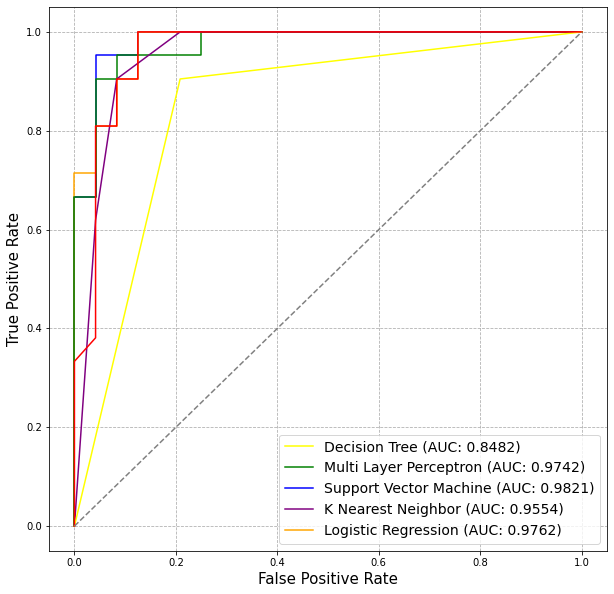

In [ ]:
#Separate the true positive rate(tpr) and the false positive rate(fpr)
lr_fpr, lr_tpr, _ = roc_curve(y_test, logreg_proba[:,1])
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_proba[:,1])
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_proba[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:,1])
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_proba[:,1])
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_proba[:,1])
#Create a figure with size 10x10 
fig, ax = plt.subplots(1, figsize=(10,10))



# plot the roc curve for the models

ax.plot(svm_fpr, svm_tpr,  color = 'blue', label='Support Vector Machine (AUC: ' + str(np.round(svm_roc_auc,4))+')')
ax.plot(lr_fpr, lr_tpr,  color = 'orange', label='Logistic Regression (AUC: ' + str(np.round(logreg_roc_auc,4))+')')
ax.plot(mlp_fpr, mlp_tpr, color = 'green', label='Multi Layer Perceptron (AUC: ' + str(np.round(mlp_roc_auc,4))+')')
ax.plot(knn_fpr, knn_tpr,  color = 'purple',label='K Nearest Neighbor (AUC: ' + str(np.round(knn_roc_auc,4))+')')
ax.plot(dt_fpr, dt_tpr,  color = 'yellow', label='Decision Tree (AUC: ' + str(np.round(dt_roc_auc,4))+')')
ax.plot(rf_fpr, rf_tpr,  color = 'red', label='Random Forest (AUC: ' + str(np.round(rf_roc_auc,4))+')')
ax.plot([0,1],[0,1], color='grey', linestyle='dashed')

# axis labels
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)

#Create handles and labels for the purpose of making a legend
handles,labels = ax.get_legend_handles_labels()
handles = [handles[4], handles[2], handles[0], handles[3], handles[1]]
labels = [labels[4], labels[2], labels[0], labels[3], labels[1]]

ax.grid(linestyle='dashed')
ax.legend(handles,labels, fontsize=14)

# show the plot
plt.show()